In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [169]:
features = ['id','cycle','setting1','setting2','setting3','s1','s2', 
            's3', 's4','s5', 's6',  's7', 's8', 's9','s10', 
            's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']
datatrain = pd.read_csv('data/train.csv')
datatest = pd.read_csv('data/test.csv')
RUL = datatest['ttf']

In [170]:
datatrain[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [171]:
datatrain[features].describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [172]:
datatrain[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [173]:
col_names = ['id','cycle','setting1','setting2','s2', 's3', 's4', 's6',  's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15',  's17',   's20', 's21']
data_train = datatrain[col_names]
data_test = datatest[col_names]

data_train.columns = col_names
data_test.columns = col_names

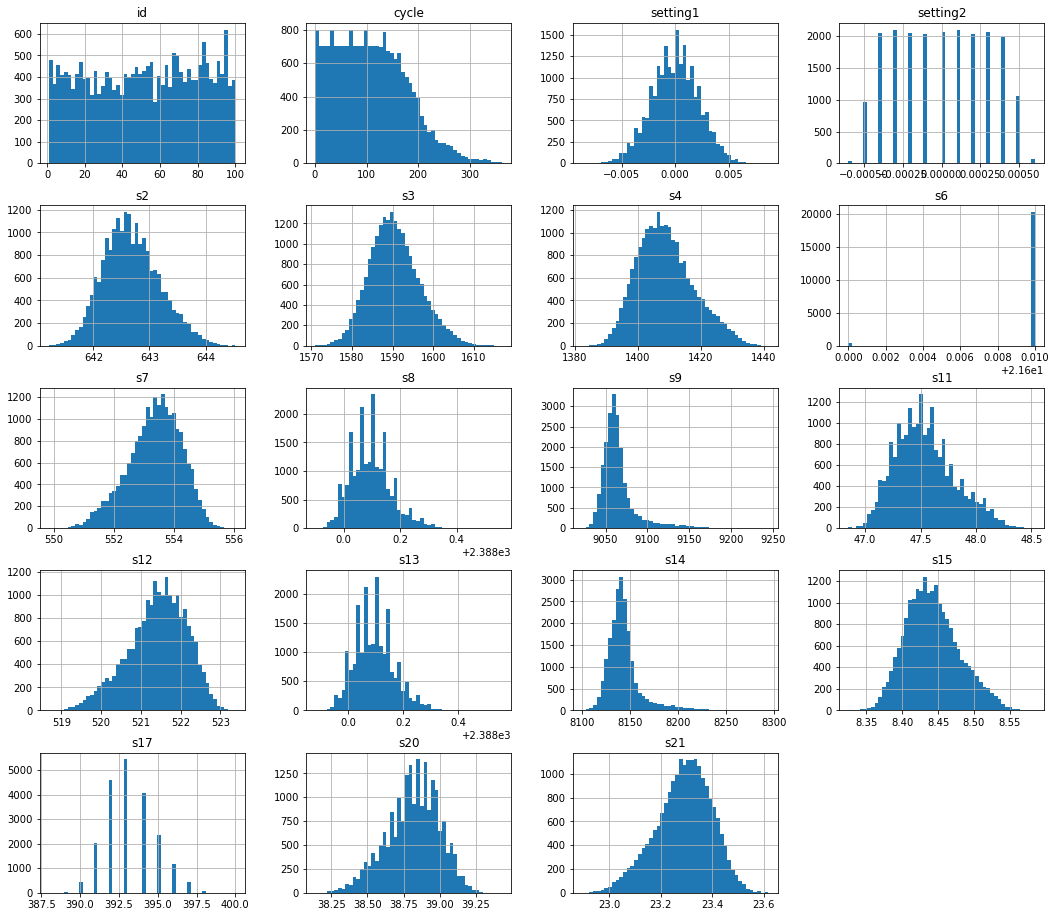

In [174]:
data_train.hist(bins=50, figsize=(18,16))
plt.show()

In [175]:
cyclestrain = data_train.groupby('id', as_index=False)['cycle'].max()
cyclestest = data_test.groupby('id', as_index=False)['cycle'].max()



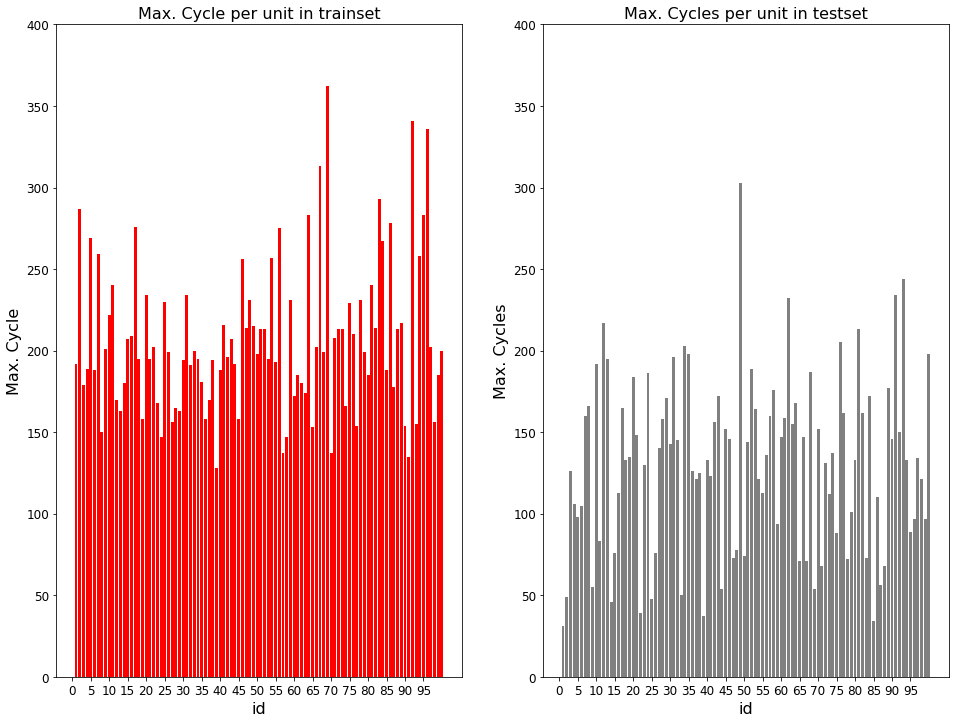

In [176]:
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['id'])
bars = plt.bar(list(cyclestrain['id']), cyclestrain['cycle'], color='red')
plt.ylim([0, 400])
plt.xlabel('id', fontsize=16)
plt.ylabel('Max. Cycle', fontsize=16)
plt.title('Max. Cycle per unit in trainset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['id']), cyclestest['cycle'], color='grey')
plt.ylim([0, 400])
plt.xlabel('id', fontsize=16)
plt.ylabel('Max. Cycles', fontsize=16)
plt.title('Max. Cycles per unit in testset', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

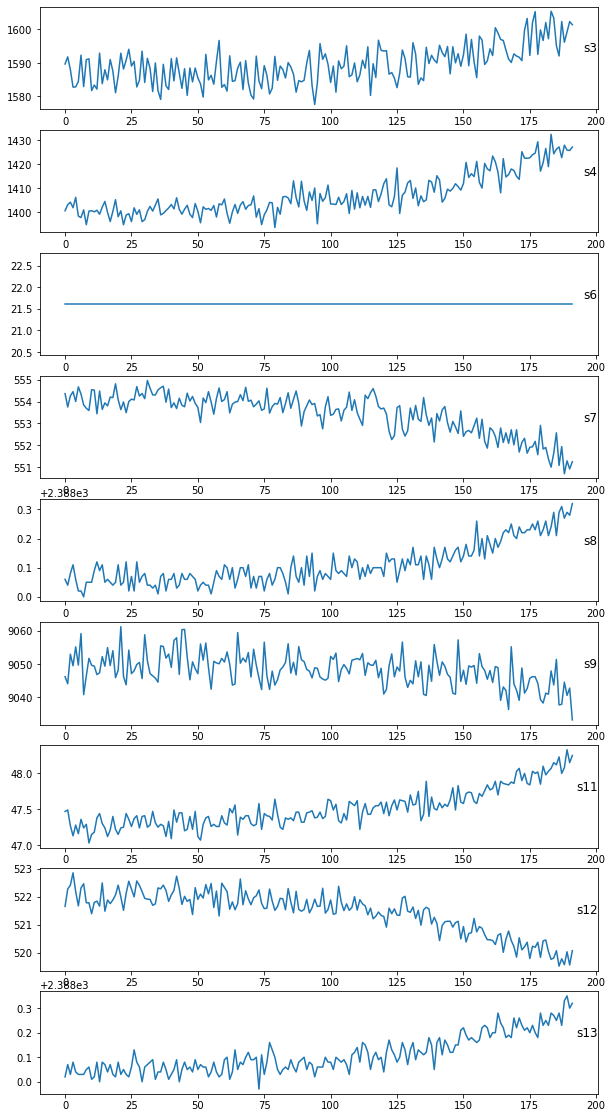

In [177]:
values = data_train[data_train.id==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data_train.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

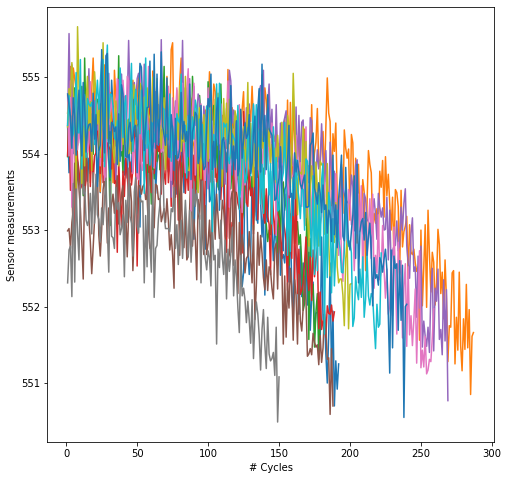

In [178]:
plt.figure(figsize = (8, 8))
plt.plot(data_train[data_train.id==1].cycle, data_train[data_train.id==1].s7)
plt.plot(data_train[data_train.id==2].cycle, data_train[data_train.id==2].s7)
plt.plot(data_train[data_train.id==3].cycle, data_train[data_train.id==3].s7)
plt.plot(data_train[data_train.id==4].cycle, data_train[data_train.id==4].s7)
plt.plot(data_train[data_train.id==5].cycle, data_train[data_train.id==5].s7)
plt.plot(data_train[data_train.id==6].cycle, data_train[data_train.id==6].s7)
plt.plot(data_train[data_train.id==7].cycle, data_train[data_train.id==7].s7)
plt.plot(data_train[data_train.id==8].cycle, data_train[data_train.id==8].s7)
plt.plot(data_train[data_train.id==9].cycle, data_train[data_train.id==9].s7)
plt.plot(data_train[data_train.id==10].cycle, data_train[data_train.id==10].s7)
plt.plot(data_train[data_train.id==11].cycle, data_train[data_train.id==11].s7)

plt.xlabel('# Cycles')
plt.ylabel('Sensor measurements')
plt.show()

In [179]:
minb = data_train.groupby('id', as_index=False).min().head(10)
maxb = data_train.groupby('id', as_index=False).max().head(10)
mmtable = minb.append(maxb, ignore_index=True)

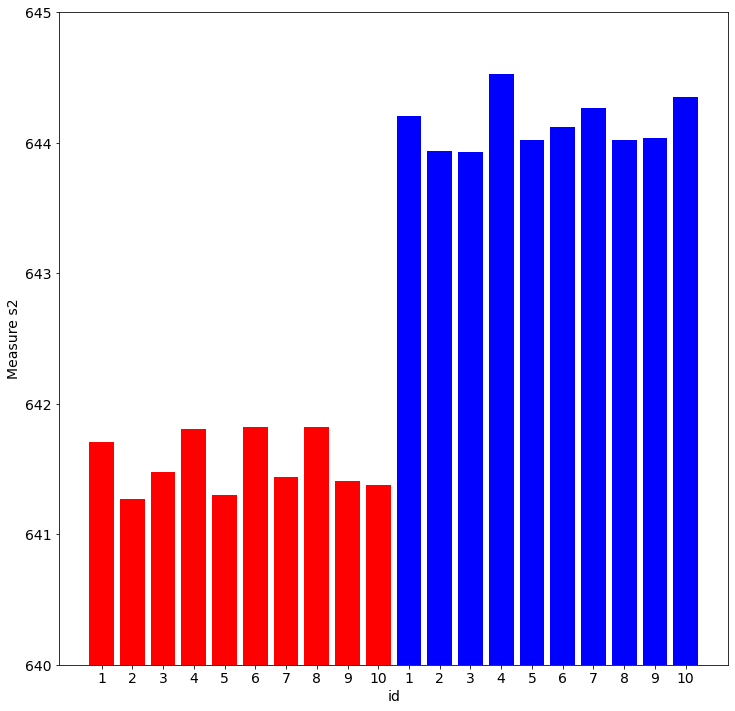

In [180]:
plt.figure(figsize = (12,12))
col = np.concatenate((np.repeat('red', 10), np.repeat('blue', 10)), axis=0)
bar_labels = list(mmtable['id'])
x_pos = list(range(len(bar_labels)))
bars = plt.bar(x_pos, mmtable['s2'], color=col)
plt.ylim([640, 645])
plt.xlabel('id', fontsize=14)
plt.ylabel('Measure s2', fontsize=14)
plt.xticks(x_pos, bar_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [181]:
data_train = pd.merge(data_train, data_train.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')


In [182]:
data_train.rename(columns={"cycles_x": "cycle", "cycles_y": "maxcycles"}, inplace=True)

In [183]:
data_train['TTF'] = data_train['cycle_y'] - data_train['cycle_x']

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [185]:
ntrain = data_train.copy()

In [186]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [187]:
ntest = data_test.copy()

In [188]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])

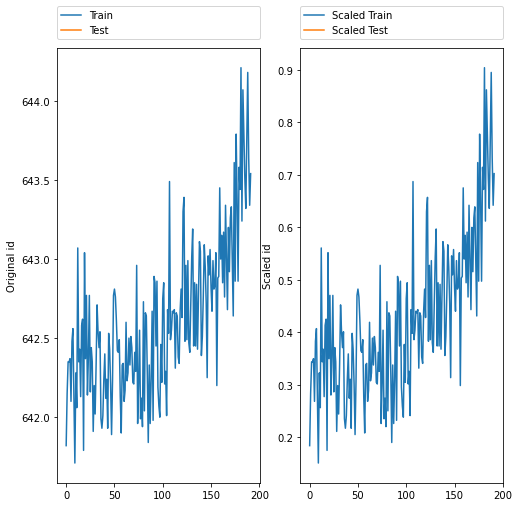

In [189]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(data_train[data_train.id==1].s2)
plt.plot(data_test[data_test.id==1].s2)
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.id==1].s2)
plt.plot(ntest[ntest.id==1].s2)
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled id')
plt.show()

In [190]:
def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

In [191]:
fTTFz = []
fTTF = []

for i in range(data_train['id'].min(),data_train['id'].max()+1):
    dat=data_train[data_train.id==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF

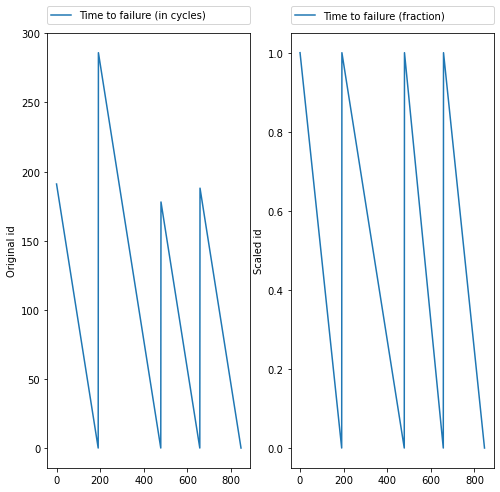

In [192]:
mx = cyclestrain.iloc[0:4,1].sum()

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(ntrain.TTF[0:mx])
plt.legend(['Time to failure (in cycles)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')
fig.add_subplot(1,2,2)
plt.plot(ntrain.fTTF[0:mx])
plt.legend(['Time to failure (fraction)'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled id')
plt.show()

<AxesSubplot:>

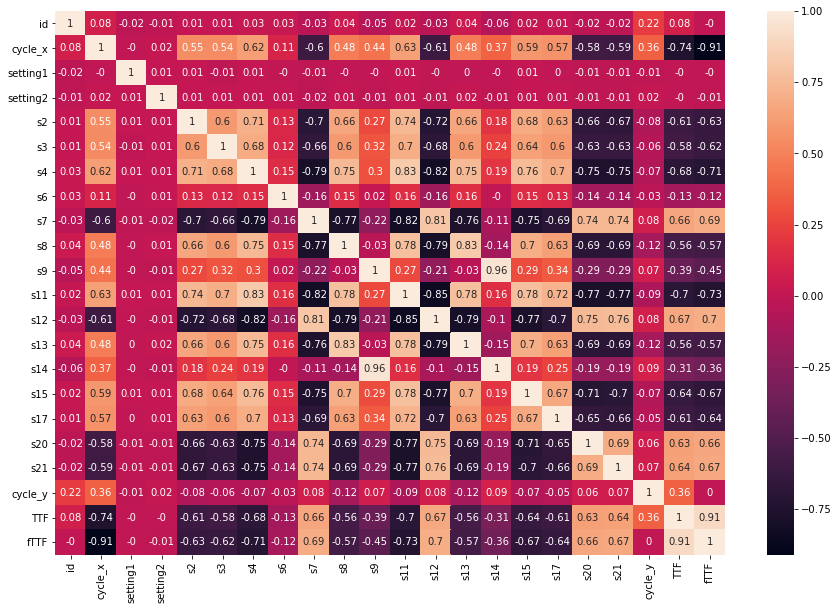

In [193]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = ntrain.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )

In [194]:
col_names_train = ['cycle_x','s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']

In [195]:
col_names_test = ['cycle','s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']

In [196]:
X_train = ntrain[col_names_train]
Y_train = ntrain['fTTF']
X_test = ntest[col_names_test]


In [197]:

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
y_pred

array([0.88205786, 0.69450453, 0.12829752, 0.36957   , 0.38094502,
       0.36957   , 0.36957   , 0.36957   , 0.64041669, 0.36957   ,
       0.64041669, 0.36957   , 0.36957   , 0.85600501, 0.64041669,
       0.36957   , 0.36957   , 0.34815789, 0.36957   , 0.12829752,
       0.36957   , 0.88205786, 0.36957   , 0.35299863, 0.73825987,
       0.64041669, 0.36957   , 0.36957   , 0.36957   , 0.36957   ,
       0.12829752, 0.36957   , 0.66503882, 0.12829752, 0.12829752,
       0.12829752, 0.36724997, 0.13554953, 0.88205786, 0.12829752,
       0.36231799, 0.12829752, 0.36231799, 0.64041669, 0.36957   ,
       0.33867058, 0.64041669, 0.64041669, 0.12829752, 0.64041669,
       0.36957   , 0.36957   , 0.20883829, 0.36957   , 0.36957   ,
       0.12829752, 0.36957   , 0.12829752, 0.5633753 , 0.36957   ,
       0.13554953, 0.36957   , 0.13554953, 0.34099677, 0.64041669,
       0.12829752, 0.64041669, 0.12829752, 0.64041669, 0.36957   ,
       0.64041669, 0.36724997, 0.36957   , 0.36957   , 0.64041

In [198]:
print(y_pred.min(), y_pred.max())

0.12829752208238338 0.8820578558189139


In [199]:
data_test = pd.merge(data_test, data_test.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')

In [200]:
data_test.rename(columns={"cycles_x": "cycle", "cycle_y": "maxcycles"}, inplace=True)

In [201]:
data_test['score'] = y_pred

In [202]:
def totcycles(data):
    return(data['cycle_x'] / (1-data['score']))
    
data_test['maxpredcycles'] = totcycles(data_test)

In [203]:
data_test['maxpredcycles'].head()

0    262.840736
1    160.395178
2    144.544731
3    168.139207
4    158.305810
Name: maxpredcycles, dtype: float64

In [204]:
def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

data_test['RUL'] = RULfunction(data_test)

In [205]:
predictedRUL = data_test['RUL']
predictedRUL[0:10]

0    231.840736
1    111.395178
2     18.544731
3     62.139207
4     60.305810
5     61.552988
6     93.795030
7     97.312343
8     97.954818
9    112.554036
Name: RUL, dtype: float64

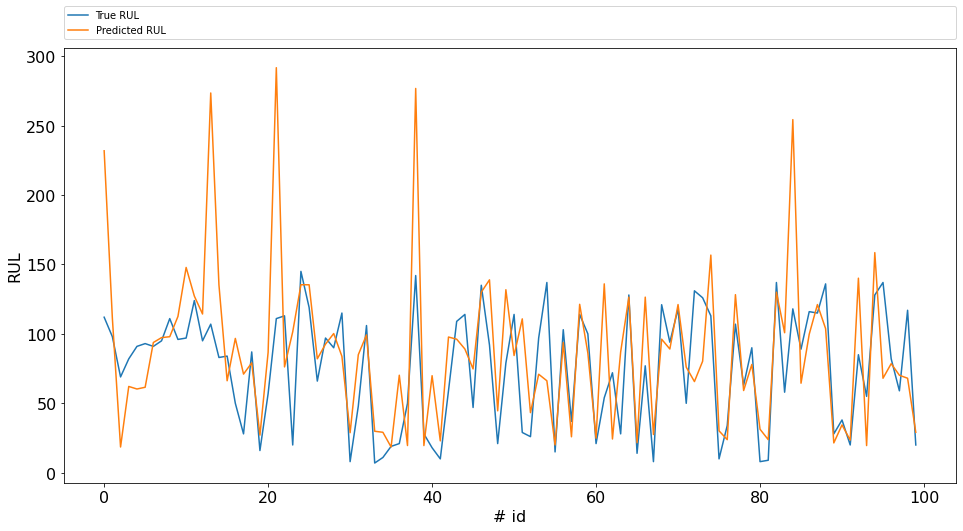

In [206]:
plt.figure(figsize = (16, 8))
plt.plot(RUL)
plt.plot(predictedRUL)
plt.xlabel('# id', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [207]:
xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []

for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))

In [208]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(RUL, xpredictedRUL)
print ('MSE on train set:',mse_test)
rmse_test = np.sqrt(mean_squared_error(RUL, xpredictedRUL))
print ('RMSE on train set:',rmse_test)

MSE on train set: 2127.96
RMSE on train set: 46.129816821661024
